<b> Zero dimensional global energy balance model including ice albedo feedback </b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
from scipy.optimize import brentq

plt.style.use('seaborn-dark')

C:\Users\ivan\AppData\Local\ESRI\conda\envs\ivan-py3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
def energy_balance(T):
    a = albedo_T(T)
    incoming = incoming_radiation(T, a)
    outgoing = outgoing_radiantion(T)
    incom_outgo = incoming - outgoing
    return incom_outgo


In [3]:
# Incoming radiation
def incoming_radiation(T, a):
    return s0 * (1 - a)

In [4]:
# Outgoing longwave radiation
def outgoing_radiantion(T):
    return (1- e/2) * sigma * T ** 4

In [5]:
# The albedo function
def albedo_T(T):
    if T > T_g:
        return a_min
    elif T < T_i:
        return a_max
    else:
        return a_max - (a_max - a_min) * (T - T_i)/(T_g - T_i)

In [6]:
# Emissivity
e = 0.77

# Stefan-Boltzmann constant
sigma = 5.67e-8; # J/(sec m^2 K^4)

# Min-Max albedo
a_min = 0.3
a_max = 0.7
T_i = 245 # K
T_g = 275 # K

# Solar constant
s0 = 1367 * 0.25 # W/m^2

In [7]:
# Inizialize temperatures
temp_np = np.arange(220, 300, 0.1)
n = len(temp_np)

albedo_np = np.zeros((n, ))
incom_np = np.zeros((n, ))
outgo_np = np.zeros((n, ))

for i, T in enumerate(temp_np):
    a = albedo_T(T) # Albedo
    incom_np[i] = incoming_radiation(T, a); # Incoming radiation
    outgo_np[i] = outgoing_radiantion(T); # Outgoing radiation
    albedo_np[i] = a

# Energy balance
incom_outgo = incom_np - outgo_np

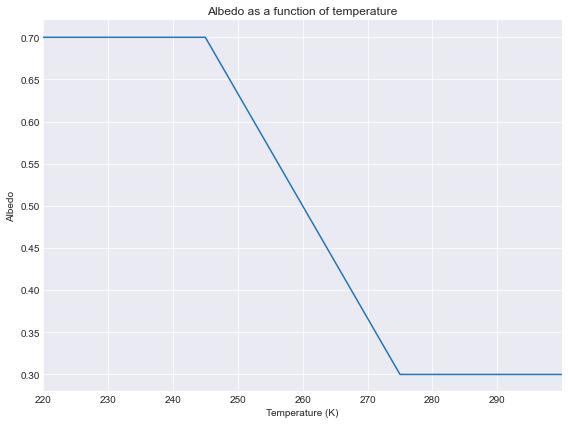

In [8]:
# Albedo as a function of temperature

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Albedo")
ax.set_title("Albedo as a function of temperature")
ax.set_xlim(temp_np.min(), temp_np.max())
ax.plot(temp_np, albedo_np, c='tab:blue')
ax.grid()
plt.tight_layout()
plt.show()

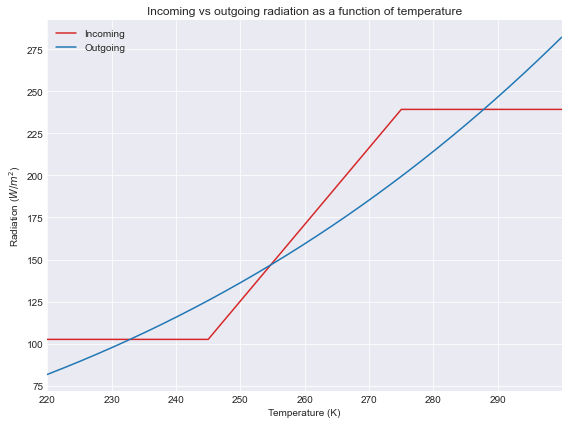

In [9]:
# Incoming vs outgoing radiation as a function of temperature

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Radiation ($W/m^{2}$)")
ax.set_title("Incoming vs outgoing radiation as a function of temperature")
ax.set_xlim(temp_np.min(), temp_np.max())
ax.plot(temp_np, incom_np, c='tab:red')
ax.plot(temp_np, outgo_np, c='tab:blue')
ax.legend(["Incoming", "Outgoing"])
ax.grid()
plt.tight_layout()
plt.show()

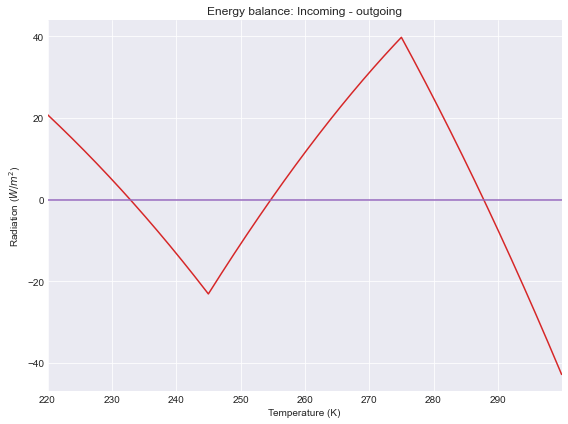

In [10]:
# Energy balance: Incoming - outgoing

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Radiation ($W/m^{2}$)")
ax.set_title("Energy balance: Incoming - outgoing")
ax.set_xlim(temp_np.min(), temp_np.max())
ax.grid()
ax.plot(temp_np, incom_outgo, c='tab:red')
ax.axhline(y=0, color='tab:purple')
plt.tight_layout()
plt.show()

In [11]:
""" Three equilibrium temperatures (Incoming=Outgoing) at intersections between the two curves
You can use the Brent or Newton-Raphson method to find the zeros """

# 1: Stable - A completly ice-covered Earth
s1 = brentq(energy_balance, 220, 250, full_output=True)

# 2: Unstable - An Earth with some ice
s2 = brentq(energy_balance, 250, 260, full_output=True)

# 3: Stable - Ice-free Earth
s3 = brentq(energy_balance, 260, 300, full_output=True)

In [12]:
print(f"Equilibrium temperatures: {round(s1[0])}K, {round(s2[0])}K, {round(s3[0])}K")

Equilibrium temperatures: 233K, 255K, 288K


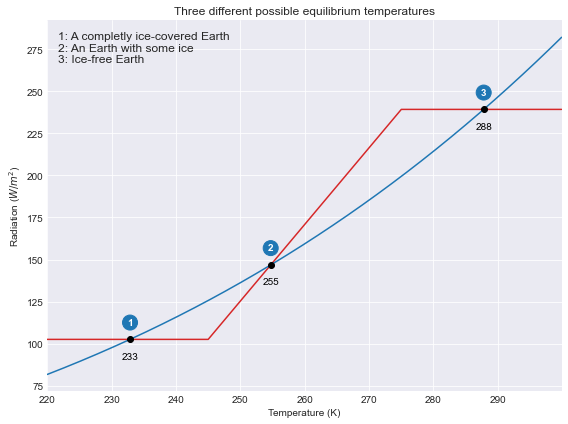

In [13]:
# Plot the three solutions

solution_x = np.array([s1[0], s2[0], s3[0]])
solution_y = np.array([incoming_radiation(T, albedo_T(T)) for T in solution_x])

fig, ax = plt.subplots(figsize = (8, 6))

ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Radiation ($W/m^{2}$)")
ax.set_title("Three different possible equilibrium temperatures")
ax.set_xlim(temp_np.min(), temp_np.max())
ax.scatter(solution_x, solution_y, c='k', zorder=5)
ax.plot(temp_np, incom_np, c='tab:red')
ax.plot(temp_np, outgo_np, c='tab:blue')

ax.text(solution_x[0], solution_y[0] + 10, "1", ha='center', 
        va='center', color="white", weight="bold",
        bbox={"boxstyle" : "circle", "color":"tab:blue"})

ax.text(solution_x[0], solution_y[0] - 10, round(solution_x[0]), 
        ha='center', va='center', color="k")

ax.text(solution_x[1], solution_y[1] + 10, "2", ha='center', 
        va='center', color="white", weight="bold",
        bbox={"boxstyle" : "circle", "color":"tab:blue"})

ax.text(solution_x[1], solution_y[1] - 10, round(solution_x[1]), 
        ha='center', va='center', color="k")

ax.text(solution_x[2], solution_y[2]+10, "3", ha='center', 
        va='center', color="white", weight="bold",
        bbox={"boxstyle" : "circle", "color":"tab:blue"})

ax.text(solution_x[2], solution_y[2] - 10, round(solution_x[2]), 
        ha='center', va='center', color="k")

leg = AnchoredText("1: A completly ice-covered Earth\n2: An Earth with some ice\n3: Ice-free Earth", 
                  loc=2, prop=dict(size=12), frameon=False)
ax.add_artist(leg)
ax.grid()
plt.tight_layout()
plt.show()